In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, title):
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap="Blues")
    plt.title(title)
    plt.show()

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [4]:
X = mnist.data
y = mnist.target

<ipython-input-5-dc479f22269b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="Set2")


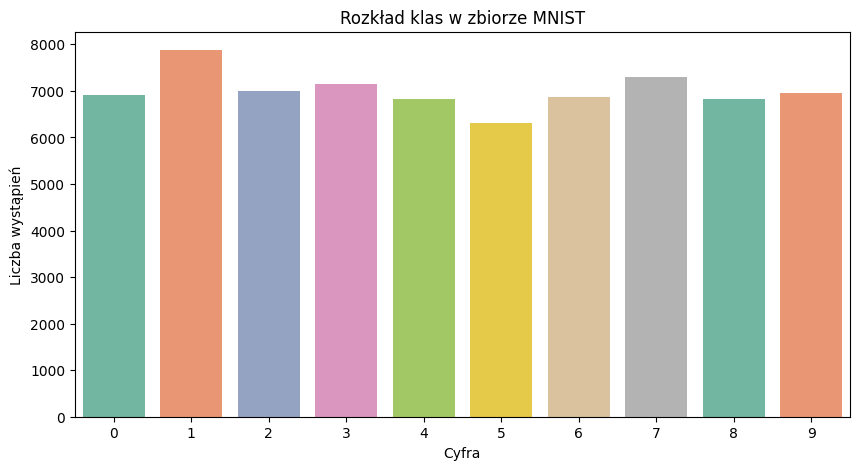

Missing values: 0


,count
label,
0,6903
1,7877
2,6990
3,7141
4,6824
5,6313
6,6876
7,7293
8,6825


In [ ]:
import pandas as pd
df = pd.DataFrame(X)
df['label'] = y
missing_values = df.isnull().sum().sum()

class_distribution = df['label'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="Set2")
plt.xlabel("Cyfra")
plt.ylabel("Liczba wystąpień")
plt.title("Rozkład klas w zbiorze MNIST")
plt.show()

print(f"Missing values: {missing_values}")
class_distribution

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier(n_neighbors=3)


===== Raport dla Regresji Logistycznej =====

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.88      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.87      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.89      0.86      0.87      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.92      0.91     14000



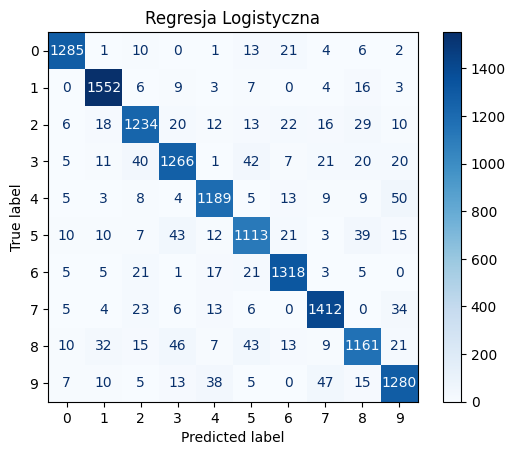


===== Raport dla SVM =====

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.92      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.93      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



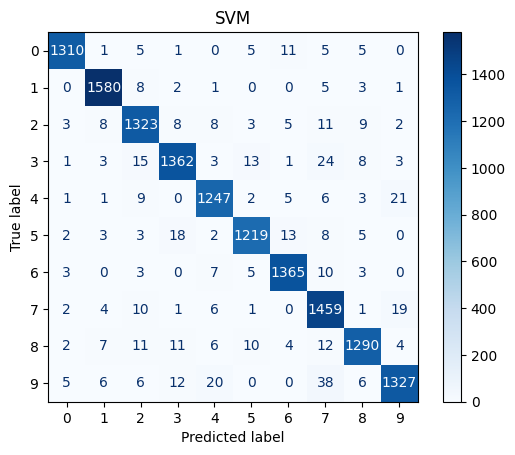


===== Raport dla KNN =====

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.94      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.95      0.94      0.94      1295
           5       0.95      0.94      0.94      1273
           6       0.97      0.97      0.97      1396
           7       0.94      0.93      0.93      1503
           8       0.97      0.90      0.93      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



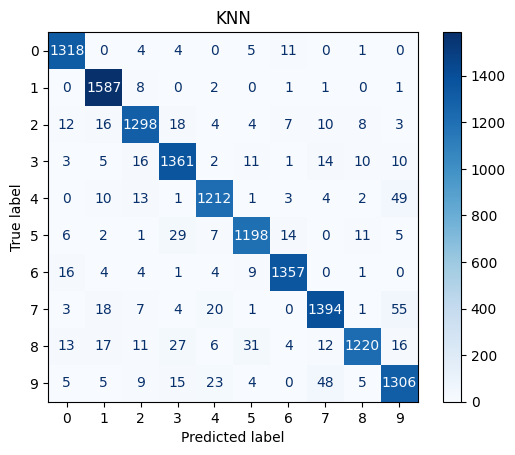

In [ ]:
print("\n===== Raport dla Regresji Logistycznej =====\n")
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "Regresja Logistyczna")

print("\n===== Raport dla SVM =====\n")
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "SVM")

print("\n===== Raport dla KNN =====\n")
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "KNN")

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['rbf']
}

param_grid_knn = {
    'n_neighbors': [3, 5],
    'weights': ['uniform']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

# grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
# grid_knn.fit(X_train, y_train)

print(f"Najlepsze parametry dla SVM: {grid_svm.best_params_}")
#print(f"Najlepsze parametry dla KNN: {grid_knn.best_params_}")

KeyboardInterrupt: 

In [ ]:
print("\n===== Raport dla SVM przy wyszukanych parametrach =====\n")
y_pred = grid_svm.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "SVM dla Grid Search")

print("\n===== Raport dla KNN przy wyszukanych parametrach  =====\n")
y_pred = grid_knn.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "KNN dla Grid Search")

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)

svm = SVC(kernel='rbf')
svm.fit(X_train_pca, y_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier(n_neighbors=3)


===== Raport dla Regresji Logistycznej =====

              precision    recall  f1-score   support

           0       0.62      0.79      0.69      1343
           1       0.73      0.97      0.84      1600
           2       0.22      0.13      0.17      1380
           3       0.51      0.54      0.52      1433
           4       0.36      0.42      0.39      1295
           5       0.17      0.07      0.10      1273
           6       0.36      0.31      0.33      1396
           7       0.39      0.68      0.50      1503
           8       0.27      0.35      0.30      1357
           9       0.20      0.03      0.05      1420

    accuracy                           0.44     14000
   macro avg       0.38      0.43      0.39     14000
weighted avg       0.39      0.44      0.40     14000



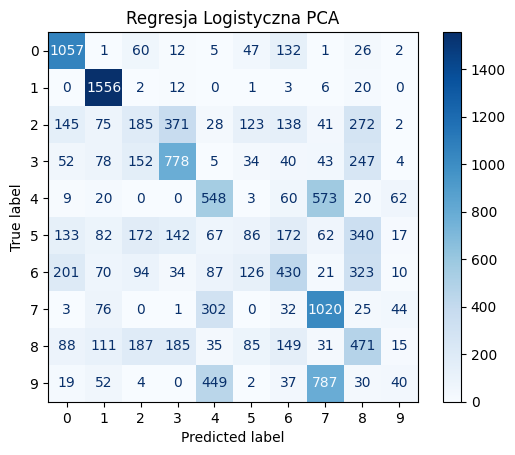


===== Raport dla SVM =====

              precision    recall  f1-score   support

           0       0.63      0.77      0.70      1343
           1       0.84      0.95      0.89      1600
           2       0.39      0.21      0.28      1380
           3       0.55      0.51      0.53      1433
           4       0.34      0.64      0.45      1295
           5       0.27      0.12      0.17      1273
           6       0.34      0.44      0.39      1396
           7       0.53      0.45      0.48      1503
           8       0.29      0.40      0.34      1357
           9       0.33      0.12      0.18      1420

    accuracy                           0.47     14000
   macro avg       0.45      0.46      0.44     14000
weighted avg       0.46      0.47      0.45     14000



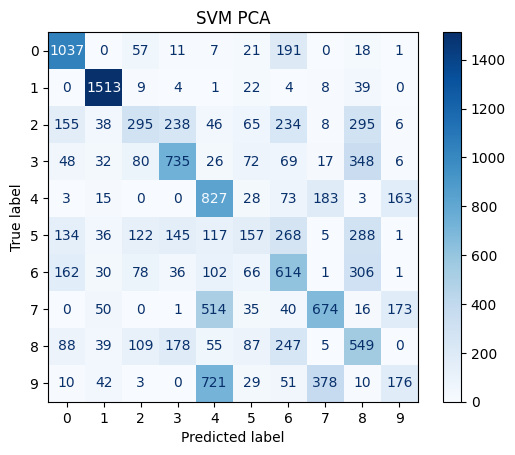


===== Raport dla KNN =====

              precision    recall  f1-score   support

           0       0.50      0.75      0.60      1343
           1       0.80      0.93      0.86      1600
           2       0.22      0.32      0.26      1380
           3       0.37      0.42      0.39      1433
           4       0.31      0.45      0.37      1295
           5       0.19      0.13      0.15      1273
           6       0.28      0.18      0.22      1396
           7       0.46      0.35      0.40      1503
           8       0.26      0.14      0.18      1357
           9       0.32      0.21      0.25      1420

    accuracy                           0.40     14000
   macro avg       0.37      0.39      0.37     14000
weighted avg       0.38      0.40      0.38     14000



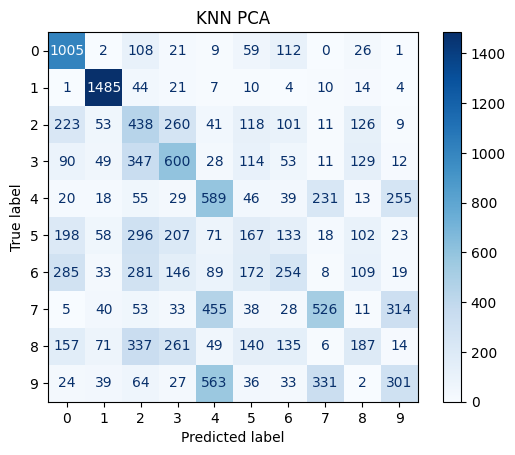

In [ ]:
print("\n===== Raport dla Regresji Logistycznej =====\n")
y_pred = log_reg.predict(X_test_pca)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "Regresja Logistyczna PCA")

print("\n===== Raport dla SVM =====\n")
y_pred = svm.predict(X_test_pca)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "SVM PCA")

print("\n===== Raport dla KNN =====\n")
y_pred = knn.predict(X_test_pca)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "KNN PCA")

In [11]:
from sklearn.utils import shuffle
X_sample, y_sample = shuffle(X, y, random_state=42, n_samples=2000)

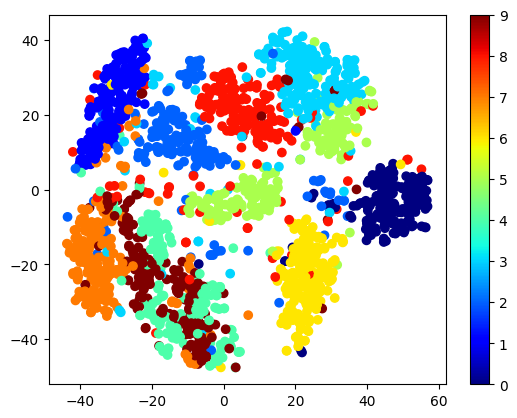

In [14]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sample)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample.astype(int), cmap='jet')
plt.colorbar()
plt.show()


===== Raport dla Random Forest =====

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



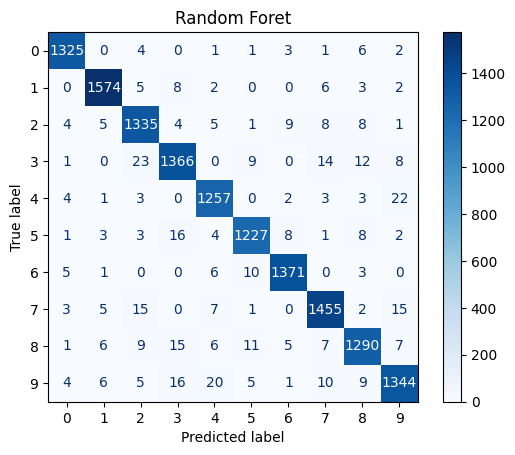

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("\n===== Raport dla Random Forest =====\n")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "Random Foret")